# Load Data

## **Import libraries**

In [38]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
%matplotlib inline

## **Clone Github repo**

In [8]:
!git clone https://github.com/ch-zheng/cchs-prediction.git
%cd cchs-prediction/

fatal: destination path 'cchs-prediction' already exists and is not an empty directory.
/content/cchs-prediction


## **Import dataset**

In [11]:
dataset = pd.read_csv('data/samples.csv')

## **View the dataset**

In [12]:
dataset.shape

(2429, 140)

In [13]:
dataset.head()

,filename,group,race,age,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,...,x48,y48,x49,y49,x50,y50,x51,y51,x52,y52,x53,y53,x54,y54,x55,y55,x56,y56,x57,y57,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67
0,pictures/control/black/0-1/1_1_1_2017010919471...,control,black,0-1,47,127,50,143,53,158,56,174,63,188,75,198,91,206,108,212,125,214,143,213,159,206,174,198,185,187,191,173,195,158,198,142,200,127,63,110,...,102,172,114,168,124,165,129,166,134,165,143,167,155,172,143,176,135,176,129,176,124,177,114,176,106,172,124,171,129,171,134,171,150,172,134,172,129,172,124,172
1,pictures/control/black/0-1/1_1_1_2017010919461...,control,black,0-1,66,116,69,132,72,147,77,161,85,174,97,183,111,189,124,193,136,194,148,190,159,183,171,175,180,164,186,151,188,137,190,122,191,106,73,113,...,111,171,120,168,127,165,132,166,137,164,145,166,155,167,146,173,139,176,134,177,128,177,121,175,115,171,127,169,133,169,138,168,151,167,138,169,133,170,128,170
2,pictures/control/black/0-1/1_0_1_2017011021283...,control,black,0-1,61,115,63,131,67,147,71,163,79,176,91,186,105,192,118,198,130,201,144,199,159,193,174,186,186,176,194,163,199,147,201,130,203,111,69,108,...,111,178,117,172,122,168,126,170,130,168,138,173,146,180,138,185,131,186,127,186,122,185,117,183,115,177,122,175,126,175,130,175,142,179,130,177,126,177,122,176
3,pictures/control/black/0-1/1_1_1_2017010919462...,control,black,0-1,62,116,65,131,69,146,74,160,81,172,92,181,104,188,116,194,129,196,141,195,152,189,163,182,173,172,180,160,184,146,188,132,189,116,73,107,...,110,171,118,168,125,165,129,166,133,165,140,168,148,171,140,176,134,178,129,178,125,177,118,175,114,171,125,170,129,170,133,170,144,171,133,170,129,171,125,170
4,pictures/control/black/0-1/1_1_1_2017010919124...,control,black,0-1,49,130,52,147,55,165,59,180,67,194,81,205,99,211,114,217,129,219,143,216,156,209,169,201,179,189,185,175,187,160,187,145,187,129,69,113,...,104,177,112,166,123,160,131,162,139,160,147,166,153,178,147,188,139,191,131,192,123,192,112,188,107,176,124,166,131,167,139,167,149,177,139,183,131,184,123,183


## **Preparing the data**

In [26]:
# temp = dataset.iloc[:, 4:]
# X = pd.DataFrame() # inputs
# for i in range(int(temp.shape[1]/2)): # tuple of points
#   X[str(i)] = dataset[['x'+str(i), 'y'+str(i)]].apply(tuple, axis=1)
X = dataset.iloc[:, 4:] # inputs
y = dataset.iloc[:, 1] # labels
y = y.replace(to_replace=["cchs"], value=0)
y = y.replace(to_replace=["control"], value=1)

0       1
1       1
2       1
3       1
4       1
       ..
2424    0
2425    0
2426    0
2427    0
2428    0
Name: group, Length: 2429, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# **Decision Trees for Classification**

## **Training and making predictions**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)

## **Evaluate the algorithm**

In [ ]:
mtx = confusion_matrix(y_test, y_pred)
mtx

array([[134,  21],
       [ 20, 311]])

Text(0.5, 257.44, 'Predicted label')

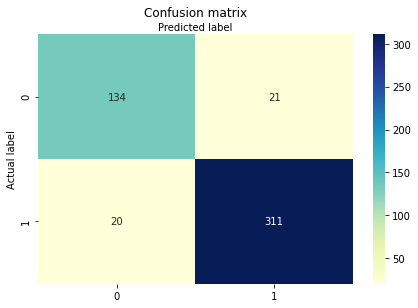

In [ ]:
# visually display confusion matrix
class_names=['cchs', 'control'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        cchs       0.87      0.86      0.87       155
     control       0.94      0.94      0.94       331

    accuracy                           0.92       486
   macro avg       0.90      0.90      0.90       486
weighted avg       0.92      0.92      0.92       486



# **Binary Logistic Regression**

## **Training and making predictions**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

## **Evaluate the algorithm**

In [ ]:
mtx = confusion_matrix(y_test, y_pred)
mtx

array([[135,  20],
       [ 57, 274]])

Text(0.5, 257.44, 'Predicted label')

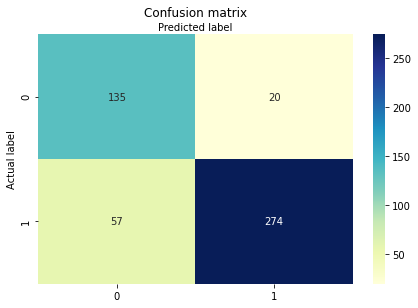

In [ ]:
# visually display confusion matrix
class_names=['cchs', 'control'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        cchs       0.70      0.87      0.78       155
     control       0.93      0.83      0.88       331

    accuracy                           0.84       486
   macro avg       0.82      0.85      0.83       486
weighted avg       0.86      0.84      0.85       486



# **LASSO Regression**

## **Training and finding the best lambda value**

### Train model

In [134]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5) # alpha is interchangeable with lambda
lasso.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.176331534807062, tolerance: 0.04181194029850739
  positive)


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [135]:
# r_squared with lambda = 0.5
print('Lasso Regression: r_squared score on training set', lasso.score(X_train, y_train))
print('Lasso Regression: r_squared score on test set', lasso.score(X_test, y_test))

Lasso Regression: r_squared score on training set 0.7043766073606239
Lasso Regression: r_squared score on test set 0.6547945056952506


### Find best lambda value for model

In [136]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10) # lambda values to test
l_size = len(lambdas)
n = X.shape[1] # number of features

train_r_squared = np.zeros(l_size) # r_squared values for each lambda on training set
test_r_squared = np.zeros(l_size) # r_squared values for each lambda on test set

In [137]:
# get r_squared values for train, test for each lambda in lambdas list
for index, l in enumerate(lambdas):
  # train model
  lasso = Lasso(alpha=l)
  lasso.fit(X_train, y_train)

  # save r_squared values
  train_r_squared[index] = lasso.score(X_train, y_train)
  test_r_squared[index] = lasso.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.25350344302548, tolerance: 0.04181194029850739
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.69680169790252, tolerance: 0.04181194029850739
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.900311783815056, tolerance: 0.04181194029850739
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.176

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


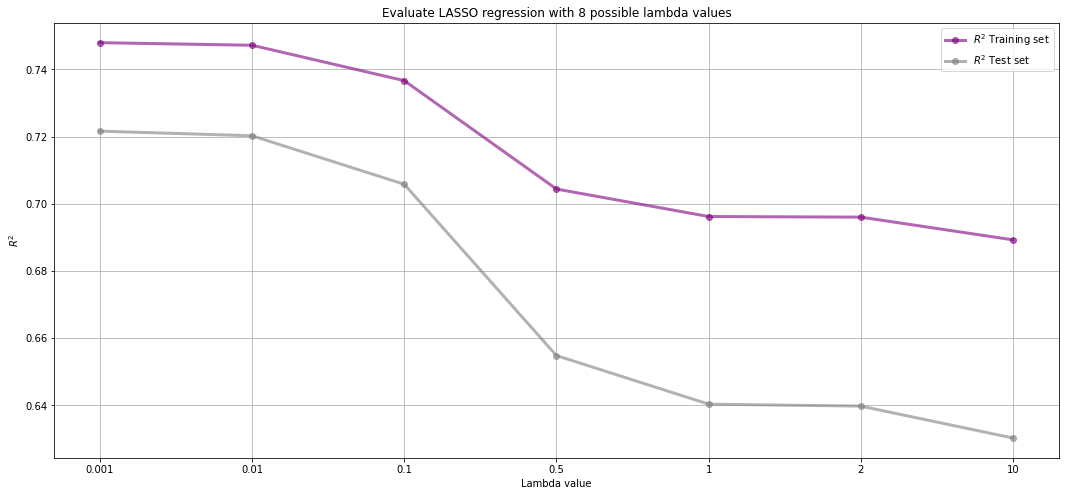

In [138]:
# plot r_squared vs. lambda
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="purple", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="grey", alpha=0.6, linewidth=3)
plt.xlabel('Lambda value')
plt.axes().set_xticks([0, 1, 2, 3, 4, 5, 6])
plt.axes().set_xticklabels([0.001, 0.01, 0.1, 0.5, 1, 2, 10]) # relabel x-axis ticks
plt.ylabel(r'$R^2$')
plt.title(r'Evaluate LASSO regression with 8 possible lambda values')
plt.legend(loc='best')
plt.grid()

In [139]:
# the lambda value that produces the highest r_squared value in the test set is 0.001
print("Lasso Regression: r_squared score on test set with lambda=0.001: ", test_r_squared[0])

Lasso Regression: r_squared score on test set with lambda=0.001:  0.7216180306795416


In [140]:
# remake model with lambda = 0.001
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.25350344302548, tolerance: 0.04181194029850739
  positive)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
y_pred = lasso.predict(X_test)

## **Evaluate the algorithm**

In [144]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R_Squared Score: ", r2_score(y_test, y_pred))

Mean Squared Error:  0.06004878556329502
R_Squared Score:  0.7216180306795417
